<a href="https://colab.research.google.com/github/MbogoriL/hello-world/blob/master/Diabetes_Statistical_Analysis_Project_Guiding_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#2F4F4F'>1. Defining the Question</font>

### a) Specifying the Data Analysis Question

What is your research question? What problem is it that you are trying to solve?

Perform univariate and bivariate analysis on the data in order to build a prediction model for the likelihood of having Diabetes

### b) Defining the Metric for Success

What will convince you that your project has succeeded?
- I am able to clearly outline which factors affect the probability of having diabetes.

### c) Understanding the context 

The management of a certain NGO Hospital would like to have a product developed that
would make predictions on whether a person has diabetics or not.
The data were collected and made available by “National Institute of Diabetes and
Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several
constraints were placed on the selection of these instances from a larger database. In
particular, all patients here belong to the Pima Indian heritage (a subgroup of Native
Americans) and are females of ages 21 and above.

### d) Recording the Experimental Design

The steps you will take from the beginning to the end of this project.
- Importing the dataset
- Previewing the dataset 
- Data cleaning
- Data analysis using graphs
- Making conclusions/recommendations based on the analysis

### e) Data Relevance

Is your data relevant to the problem or research question?

Yes, the data is relevant.

## <font color='#2F4F4F'>2. Data Cleaning & Preparation</font>

In [3]:
# load libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load and preview dataset
diabetes = pd.read_csv('https://bit.ly/3eoAbDS')
#diabetes = pd.read_csv('datasets_185987_416528_diabetes2.csv')
diabetes.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
346,1,139,46,19,83,28.7,0.654,22,0
350,4,92,80,0,0,42.2,0.237,29,0
552,6,114,88,0,0,27.8,0.247,66,0


In [ ]:
# preview dataset shape
diabetes.shape

(768, 9)

In [ ]:
# look for duplicates
diabetes.duplicated().sum()

0

In [ ]:
# look for missing records

diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# preview datatypes

diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
# check for outliers

Q1 = diabetes.quantile(0.25)
Q3 = diabetes.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = diabetes[((diabetes < (Q1 - 1.5 * IQR)) | (diabetes > (Q3 + 1.5 * IQR))).any(axis=1)]

outliers_iqr.shape

(129, 9)

## <font color='#2F4F4F'>3. Data Analysis</font>

### 3.1 General Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


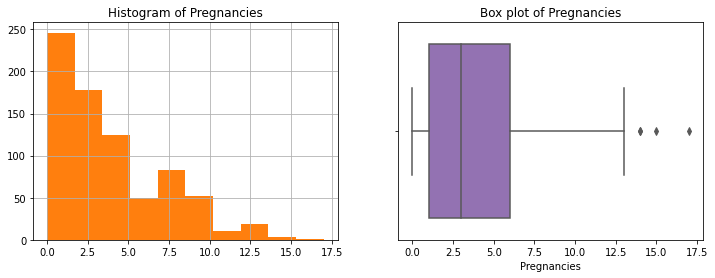

In [ ]:
# distribution of Pregnancies
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes.Pregnancies.hist(color = '#ff7f0e')
plt.title('Histogram of Pregnancies')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.Pregnancies, color = '#9467bd')
plt.title('Box plot of Pregnancies')

plt.show()

In [ ]:
# summary statistics of Pregnancies
diabetes.Pregnancies.describe()

count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64

What do you observe about the Pregnancies variable?

- Most pregrancies range between 0(no babies) and 5.
- Max value of 17 pregnancies seems highly unlikely

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


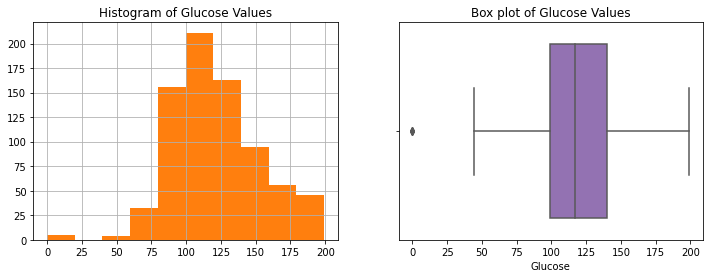

In [ ]:
# distribution of Glucose
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes.Glucose.hist(color = '#ff7f0e')
plt.title('Histogram of Glucose Levels')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.Glucose, color = '#9467bd')
plt.title('Box plot of Glucose Levels')

plt.show()

In [ ]:
# summary statistics of Glucose
diabetes.Glucose.describe()

count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64

What do you observe about the Glucose variable?

- Majority of the test subjects are within the normal range of glucose levels
- Highly unlikely to have a glucose level of 0, maybe it's missing data. May need to be done some imputation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


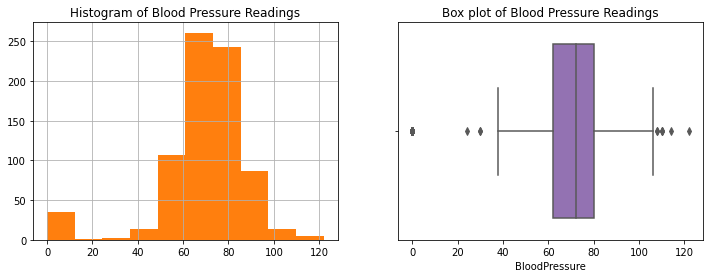

In [ ]:
# distribution of BloodPressure

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes.BloodPressure.hist(color = '#ff7f0e')
plt.title('Histogram of Blood Pressure Readings')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.BloodPressure, color = '#9467bd')
plt.title('Box plot of Blood Pressure Readings')

plt.show()

In [ ]:
# summary statistics of BloodPressure

diabetes.BloodPressure.describe()

count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64

Note your observations.

- Minimum B.P value of 0 is highly unlikely
- B.P values seems to fall in a normal distribution


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


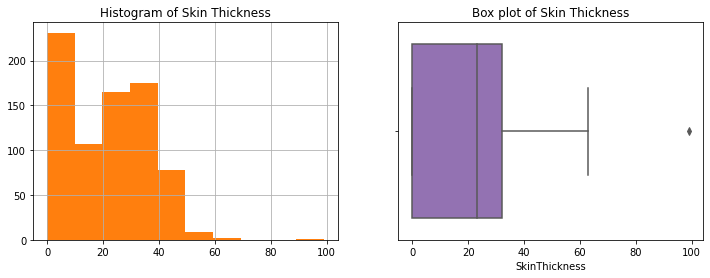

In [ ]:
# distribution of SkinThickness

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes.SkinThickness.hist(color = '#ff7f0e')
plt.title('Histogram of Skin Thickness')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.SkinThickness, color = '#9467bd')
plt.title('Box plot of Skin Thickness')

plt.show()

In [ ]:
# summary statistics of SkinThickness

diabetes.SkinThickness.describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

Note your observations.

- Skin thickness of 0.0 is highly unlikely
- Majority of the respondents had skin thickness values higher than the median


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


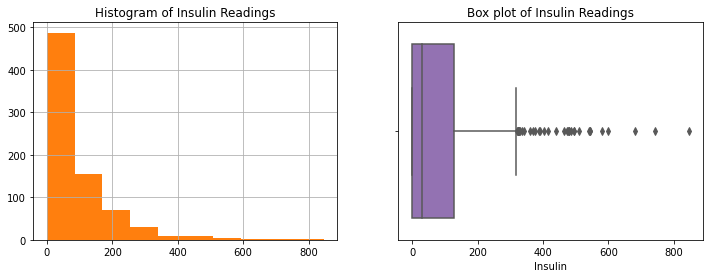

In [ ]:
# distribution of Insulin


fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes.Insulin.hist(color = '#ff7f0e')
plt.title('Histogram of Insulin Readings')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.Insulin, color = '#9467bd')
plt.title('Box plot of Insulin Readings')

plt.show()

In [ ]:
# summary statistics of Insulin
diabetes.Insulin.describe()

count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

Note your observations.

In [ ]:
Not possible to have insulin level of 0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


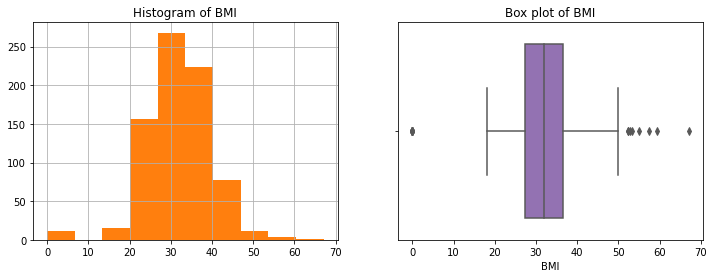

In [ ]:
# distribution of BMI
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes.BMI.hist(color = '#ff7f0e')
plt.title('Histogram of BMI')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.BMI, color = '#9467bd')
plt.title('Box plot of BMI')

plt.show()

In [ ]:
# summary statistics of BMI

diabetes.BMI.describe()

count    768.000000
mean      31.992578
std        7.884160
min        0.000000
25%       27.300000
50%       32.000000
75%       36.600000
max       67.100000
Name: BMI, dtype: float64

Note your observations.

In [ ]:
#Underweight = <18.5
#Normal weight = 18.5–24.9
#Overweight = 25–29.9
#Obesity = BMI of 30 or greater

Majority of the respondents are overweight(have BMI greater than 24.9)
Most of the respondents fall within a small range of values
The maximum value of 67 seems highly unlikely

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


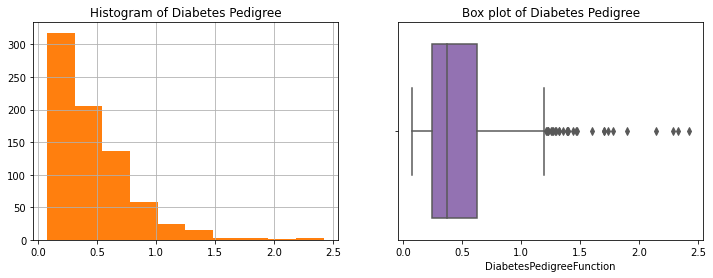

In [ ]:
# distribution of DiabetesPedigreeFunction

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes.DiabetesPedigreeFunction.hist(color = '#ff7f0e')
plt.title('Histogram of Diabetes Pedigree')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.DiabetesPedigreeFunction, color = '#9467bd')
plt.title('Box plot of Diabetes Pedigree')

plt.show()

In [ ]:
# summary statistics of DiabetesPedigreeFunction

diabetes.DiabetesPedigreeFunction.describe()

count    768.000000
mean       0.471876
std        0.331329
min        0.078000
25%        0.243750
50%        0.372500
75%        0.626250
max        2.420000
Name: DiabetesPedigreeFunction, dtype: float64

Note your observations.

- The values fall within a small range of values(the standard deviation is less than 1)
- Majority of the values are higher than the median values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


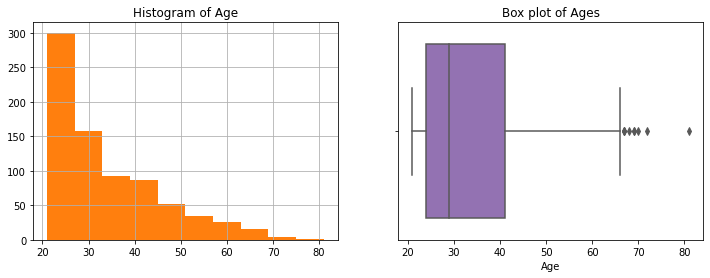

In [ ]:
# distribution of Age

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
diabetes.Age.hist(color = '#ff7f0e')
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.Age, color = '#9467bd')
plt.title('Box plot of Ages')

plt.show()

In [ ]:
# summary statistics of Age

diabetes.Age.describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

Note your observations.

In [ ]:
More than half of the respondents are below 40 yeard old.

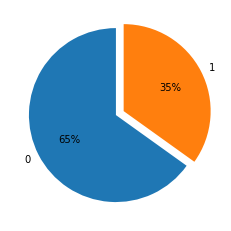

In [ ]:
# distribution of outcome - create a pie chart

outcome = diabetes['Outcome']
counts = outcome.value_counts()
explode = (0, 0.1)

plt.pie(counts, startangle = 90, autopct = '%.0f%%', labels=(0,1), explode=explode )

plt.show()


Note your observations.

-Most of the respondents do not have diabetes

### 3.2 Research-Specific Analysis

Since our research question requires us to discover the factors that determine whether a patient has diabetes or not, we will make the 'Outcome' variable our main focus during this analysis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


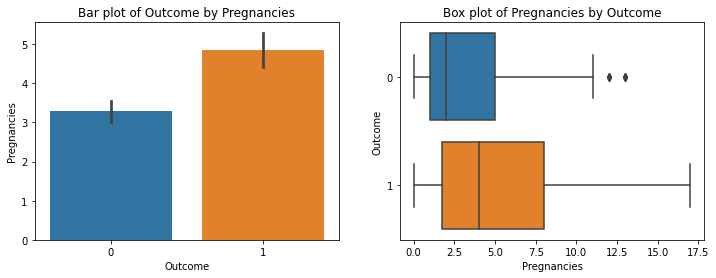

In [ ]:
# box and bar plots of Pregnancies by Outcome
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes, x = 'Outcome', y = 'Pregnancies')
plt.title('Bar plot of Outcome by Pregnancies')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.Pregnancies, diabetes.Outcome, orient = 'h')
plt.title('Box plot of Pregnancies by Outcome')

plt.show()

What do you notice?

- The chances of having Diabetes increases with the pregnancies

In [1]:
# box and bar plots of Glucose by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes, x = 'Outcome', y = 'Glucose')
plt.title('Bar plot of Outcome by Glucose')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.Glucose, diabetes.Outcome, orient = 'h')
plt.title('Box plot of Glucose by Outcome')

plt.show()

NameError: ignored

Note your observartions.

In [ ]:
- Having glucose levels of around 140, indicates the probability of having Diabetes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


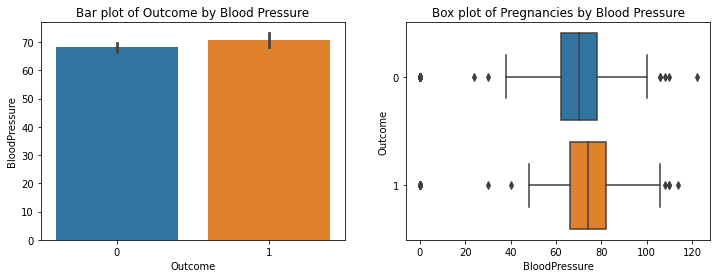

In [ ]:
# box and bar plots of BloodPressure by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes, x = 'Outcome', y = 'BloodPressure')
plt.title('Bar plot of Outcome by Blood Pressure')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.BloodPressure, diabetes.Outcome, orient = 'h')
plt.title('Box plot of Pregnancies by Blood Pressure')

plt.show()

Note your observations.

In [ ]:
Blood pressure is not a good measure of the possibility of having Diabetes. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


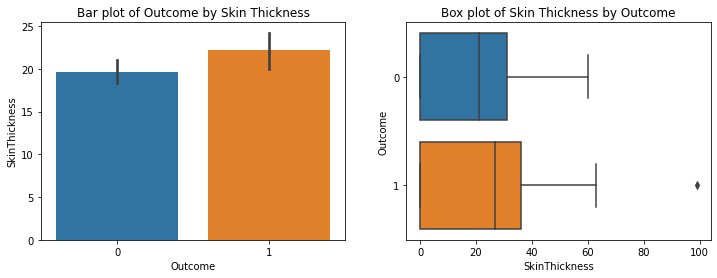

In [ ]:
# box and bar plots of SkinThickness by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes, x = 'Outcome', y = 'SkinThickness')
plt.title('Bar plot of Outcome by Skin Thickness')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.SkinThickness, diabetes.Outcome, orient = 'h')
plt.title('Box plot of Skin Thickness by Outcome')

plt.show()

Note your observations.

In [ ]:
The skin thickness has little effect on the possibility of having diabetes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


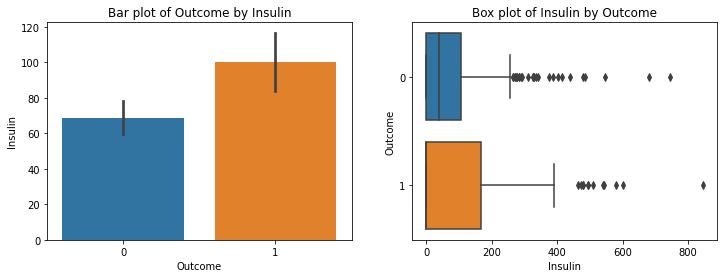

In [ ]:
# box and bar plots of Insulin by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes, x = 'Outcome', y = 'Insulin')
plt.title('Bar plot of Outcome by Insulin')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.Insulin, diabetes.Outcome, orient = 'h')
plt.title('Box plot of Insulin by Outcome')

plt.show()

Note your observations.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


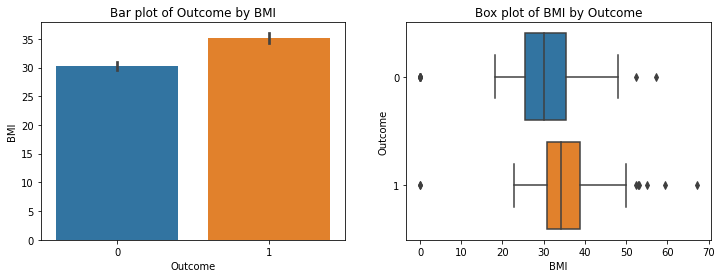

In [ ]:
# box and bar plots of BMI by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes, x = 'Outcome', y = 'BMI')
plt.title('Bar plot of Outcome by BMI')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.BMI, diabetes.Outcome, orient = 'h')
plt.title('Box plot of BMI by Outcome')

plt.show()

Note your observations.

In [ ]:
The BMI values have a large influence on the probability of having diabetes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


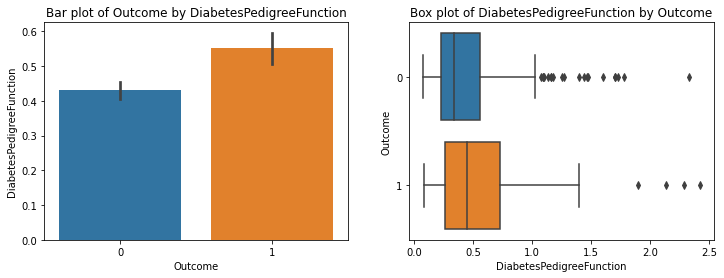

In [ ]:
# box and bar plots of DiabetesPedigreeFunction by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes, x = 'Outcome', y = 'DiabetesPedigreeFunction')
plt.title('Bar plot of Outcome by DiabetesPedigreeFunction')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.DiabetesPedigreeFunction, diabetes.Outcome, orient = 'h')
plt.title('Box plot of DiabetesPedigreeFunction by Outcome')

plt.show()

Note your observations.

In [ ]:
The Diabetes pedigree function has a high influence on the probability of having diabetes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


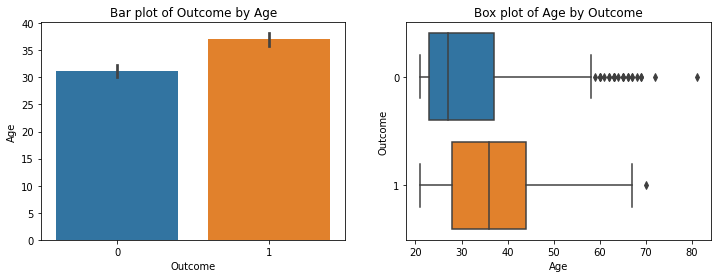

In [ ]:
# box and bar plots of Age by Outcome

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 4))

plt.subplot(1, 2, 1)
sns.barplot(data = diabetes, x = 'Outcome', y = 'Age')
plt.title('Bar plot of Outcome by Age')

plt.subplot(1, 2, 2)
sns.boxplot(diabetes.Age, diabetes.Outcome, orient = 'h')
plt.title('Box plot of Age by Outcome')

plt.show()

Note your observations.
- The older the respondents the more likely they are to have diabetes




## <font color='#2F4F4F'>4. Summary of Findings</font>

Interpret and summarize the findings of your analysis.

- Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the possibility of having diabetes
- Higher blood pressure is correlated with a person not being diabetic. 

## <font color='#2F4F4F'>5. Recommendations</font>

What would you recommend the NGO Hospital to do based on the findings of your analysis?
- Encourage people to have healthier lifestyles so as to reduce the BMI, which is a strong factor in getting diabetes.
- Encourage pregnant women to eat well as they are likely to get diabetes during their pregnancy.

## <font color='#2F4F4F'>6. Challenging your Solution</font>

### a) Did we have the right data?
Yes we had the right data

### b) Did we have the right question?

